In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_df = pd.read_csv('customers.csv')

In [2]:
customer_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [3]:
customer_df[['Ever_Married', 'Graduated']] = customer_df[['Ever_Married', 'Graduated']].fillna('Maybe')
customer_df.Profession = customer_df.Profession.fillna('Unemployed')
customer_df.Work_Experience = customer_df.Work_Experience.fillna(customer_df.Work_Experience.median()).astype('int64')
customer_df.Family_Size = customer_df.Family_Size.fillna(customer_df.Family_Size.median()).astype('int64')
customer_df.Var_1 = customer_df.Var_1.fillna('Cat_6')

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(sparse_output=False, dtype='int64')
scaler = StandardScaler()

encoder_targets = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
scaler_targets = ['Age', 'Work_Experience', 'Family_Size']

encoded_targets = encoder.fit_transform(customer_df[encoder_targets])
scaled_targets = scaler.fit_transform(customer_df[scaler_targets])

encoded_df = pd.DataFrame(encoded_targets, columns=encoder.get_feature_names_out())
scaled_df = pd.DataFrame(scaled_targets, columns=scaler.get_feature_names_out())

X = pd.concat([scaled_df, encoded_df], axis=1)
X = X.drop(['Gender_Female', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Artist', 'Spending_Score_Low', 'Var_1_Cat_6'], axis=1)

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(X)

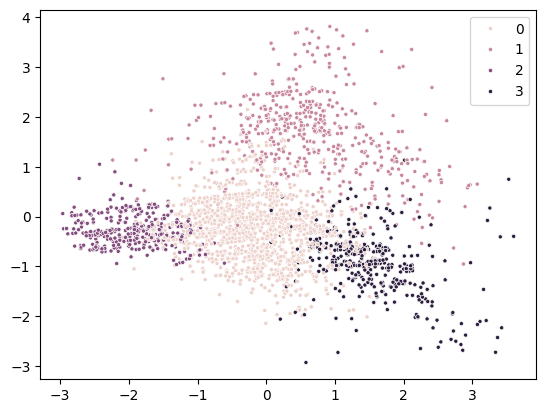

In [106]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)
cluster = model.fit(X)

customer_df['Category'] = cluster.labels_

sns.scatterplot(x=components[:,0], y=components[:,1], hue=cluster.labels_, marker='.')
plt.show()

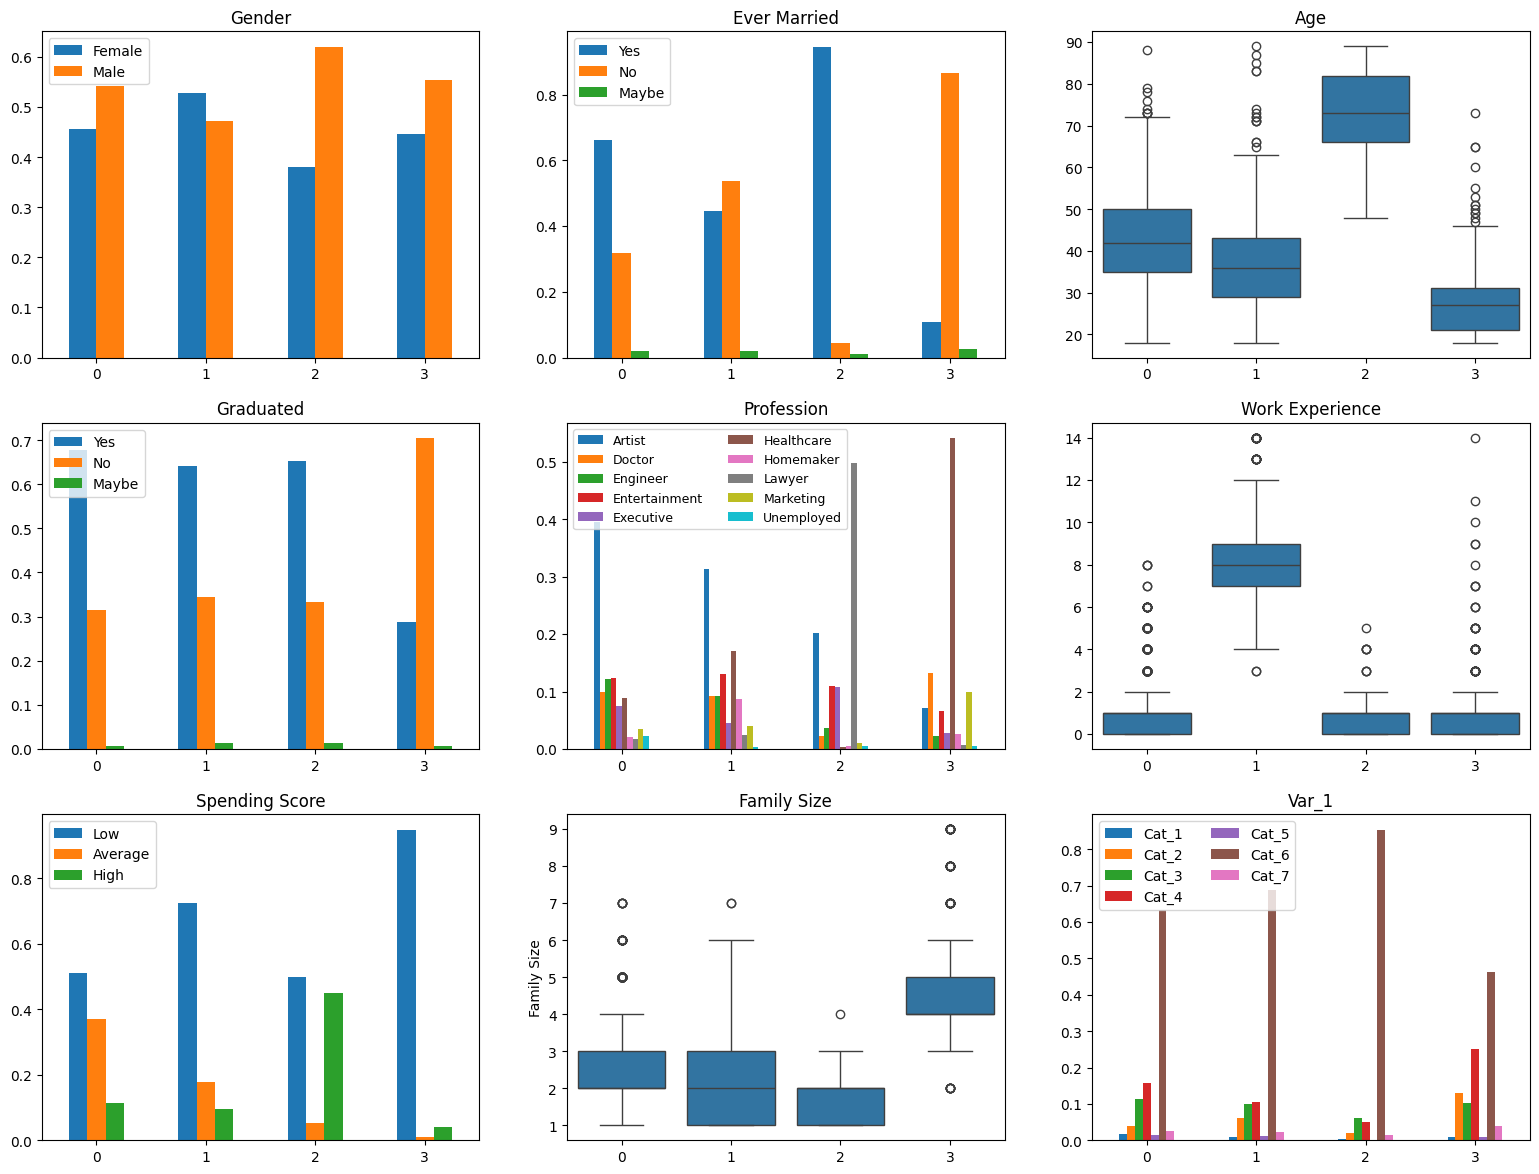

In [109]:
fig, ax = plt.subplots(3, 3, figsize=(19.2, 14.4))

gender_distribution = pd.crosstab(customer_df.Category, customer_df.Gender, normalize='index')
gender_distribution.plot(kind='bar', rot=0, ax=ax[0,0])
ax[0,0].legend(loc='upper left')
ax[0,0].set_title('Gender')
ax[0,0].set_xlabel('')

married_distribution = pd.crosstab(customer_df.Category, customer_df.Ever_Married, normalize='index').reindex(['Yes', 'No', 'Maybe'], axis='columns')
married_distribution.plot(kind='bar', rot=0, ax=ax[0,1])
ax[0,1].legend(loc='upper left')
ax[0,1].set_title('Ever Married')
ax[0,1].set_xlabel('')

sns.boxplot(customer_df, x='Category', y='Age', ax=ax[0,2])
ax[0,2].set_title('Age')
ax[0,2].set_ylabel('')
ax[0,2].set_xlabel('')

graduated_distribution = pd.crosstab(customer_df.Category, customer_df.Graduated, normalize='index').reindex(['Yes', 'No', 'Maybe'], axis='columns')
graduated_distribution.plot(kind='bar', rot=0, ax=ax[1,0])
ax[1,0].legend(loc='upper left')
ax[1,0].set_title('Graduated')
ax[1,0].set_xlabel('')

profession_distribution = pd.crosstab(customer_df.Category, customer_df.Profession, normalize='index')
profession_distribution.plot(kind='bar', rot=0, ax=ax[1,1])
ax[1,1].legend(loc='upper left', ncol=2, fontsize=9)
ax[1,1].set_title('Profession')
ax[1,1].set_xlabel('')

sns.boxplot(customer_df, x='Category', y='Work_Experience', ax=ax[1,2])
ax[1,2].set_title('Work Experience')
ax[1,2].set_ylabel('')
ax[1,2].set_xlabel('')

spending_distribution = pd.crosstab(customer_df.Category, customer_df.Spending_Score, normalize='index').reindex(['Low', 'Average', 'High'], axis='columns')
spending_distribution.plot(kind='bar', rot=0, ax=ax[2,0])
ax[2,0].legend(loc='upper left')
ax[2,0].set_title('Spending Score')
ax[2,0].set_xlabel('')

sns.boxplot(customer_df, x='Category', y='Family_Size', ax=ax[2,1])
ax[2,1].set_title('Family Size')
ax[2,1].set_ylabel('Family Size')
ax[2,1].set_xlabel('')

var_distribution = pd.crosstab(customer_df.Category, customer_df.Var_1, normalize='index')
var_distribution.plot(kind='bar', rot=0, ax=ax[2,2])
ax[2,2].legend(loc='upper left', ncols=2)
ax[2,2].set_title('Var_1')
ax[2,2].set_xlabel('')

plt.show()